<a href="https://colab.research.google.com/github/VoKisnaHai1102/Frames-to-Fables/blob/main/Assignment%204/240563_KrishnaAg_assgn4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [112]:
from google.colab import files
file = files.upload()

Saving new_dataset.csv to new_dataset (1).csv


In [113]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('new_dataset.csv')
df.head(5)

,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [114]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [115]:
stopwords = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df.head(5)

,sentiment,text
0,Negative,@xnausikaax oh no! u order from? that's horrible
1,Negative,A great hard training weekend over. couple day...
2,Negative,"Right, work Only 5 hours go I'm free xD"
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...


**Next, we'll remove some other info we dont need right now, like the handle names.**

In [116]:
#ENTER YOUR CODE HERE

In [117]:
import re


df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', re.sub(r'http\S+|@\w+', '', x)))
df.head(5)

,sentiment,text
0,Negative,oh no u order from thats horrible
1,Negative,A great hard training weekend over couple days...
2,Negative,Right work Only hours go Im free xD
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...


**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [118]:
#ENTER YOUR CODE HERE

In [119]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head(5)

,sentiment,text
0,Negative,oh no u order from that horribl
1,Negative,a great hard train weekend over coupl day rest...
2,Negative,right work onli hour go im free xd
3,Negative,i crave japanes food
4,Negative,jean michel jarr concert tomorrow gotta work t...


**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [120]:
#ENTER YOUR CODE HERE

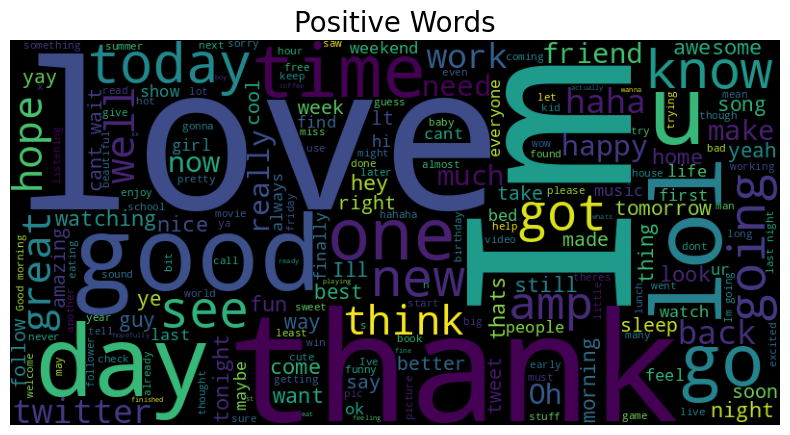

In [121]:
# Create and display positive word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title('Positive Words', fontsize=20)
plt.show()

In [122]:
#ENTER YOUR CODE HERE

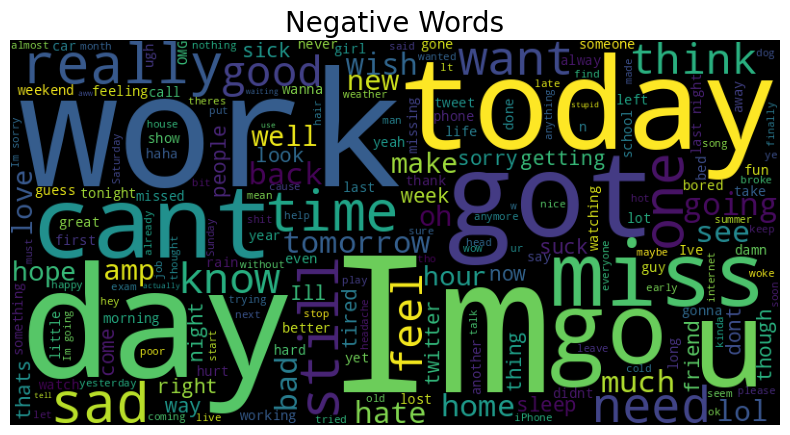

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Create and display negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title('Negative Words', fontsize=20)
plt.show()


**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [124]:
#ENTER YOUR CODE HERE

In [125]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=1000, random_state=42)

print("Training Set Size:", len(X_train))
print("Test Set Size:", len(X_test))


Training Set Size: 9000
Test Set Size: 1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [126]:
#ENTER YOUR CODE HERE

In [127]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index)
word_index = tokenizer.word_index
print("Vocabulary Size:", vocab_size)



Vocabulary Size: 11071


**Now transform the training and testing word sequences.**

In [128]:
#ENTER YOUR CODE HERE

In [129]:

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_seq, X_test_seq

([[1, 28, 408, 4163, 745, 1136, 745, 16, 229, 6, 4164],
  [71, 1392, 33, 4165, 76, 1393, 69, 137, 72, 66, 4166, 398],
  [601, 334, 17, 310, 2, 4167, 162, 4168, 138],
  [64, 287, 226, 2831, 7, 335, 708],
  [169, 124, 2, 34, 513, 90, 166, 79, 5, 2, 3, 55, 640, 2832, 5, 56],
  [66, 24, 466, 34, 166, 91],
  [288, 1394, 229, 1239],
  [3, 4169, 233, 2833],
  [746, 1593, 2834, 920, 1593, 2834, 4170, 399],
  [496, 217, 2835],
  [23, 141, 3, 2836, 1859, 30],
  [64, 1, 1395, 115, 58, 70],
  [289, 4171, 54, 4172, 534],
  [2837, 497, 1594, 690],
  [189, 264, 367, 843, 1137, 82, 514, 791, 4173],
  [1, 22, 24, 7, 1860, 190, 16, 111, 4174, 1595, 111, 4175, 1, 23, 1240, 21],
  [7, 55, 118],
  [4176, 2, 400, 2, 2225, 35, 158],
  [978, 2226, 97, 921, 2838, 25, 979, 658, 336, 4177, 288, 60, 4178],
  [449, 46, 1, 111, 844, 845, 2227],
  [318],
  [104, 4179, 153, 1596, 290, 3, 16, 5, 368, 180],
  [358, 4180, 163],
  [185, 691, 2839, 147, 1861, 2840, 22, 173, 535, 409, 659],
  [692, 1, 31, 35, 4, 142, 2228,

**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [130]:
#ENTER YOUR CODE HERE

In [131]:
X_train_seq = pad_sequences(X_train_seq, padding='pre', maxlen=MAX_SEQUENCE_LENGTH)
X_test_seq = pad_sequences(X_test_seq, padding='pre', maxlen=MAX_SEQUENCE_LENGTH)

# Clip any token indices ≥ vocab_size
X_train_seq = np.clip(X_train_seq, 0, vocab_size - 1)
X_test_seq = np.clip(X_test_seq, 0, vocab_size - 1)
X_train_seq, X_test_seq

(array([[    0,     0,     0, ...,   229,     6,  4164],
        [    0,     0,     0, ...,    66,  4166,   398],
        [    0,     0,     0, ...,   162,  4168,   138],
        ...,
        [    0,     0,     0, ...,    37,    55,   498],
        [    0,     0,     0, ...,   916,   976, 11070],
        [    0,     0,     0, ...,     9,   971,    87]], dtype=int32),
 array([[   0,    0,    0, ..., 2164,  120,   10],
        [   0,    0,    0, ...,  563,  274,  420],
        [   0,    0,    0, ..., 3207,  182,    5],
        ...,
        [   0,    0,    0, ...,   14,   82,   53],
        [   0,    0,    0, ...,  190,  101, 3706],
        [   0,    0,    0, ...,   54, 1698,  223]], dtype=int32))

**Label encode y.**

In [132]:
#ENTER YOUR CODE HERE

In [133]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_encoded, y_test_encoded

(array([0, 0, 0, ..., 1, 0, 1]),
 array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
     

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [134]:
import tensorflow as tf
import numpy as np
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-06-16 17:08:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-16 17:08:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-16 17:08:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zi

In [135]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
MAX_SEQUENCE_LENGTH = max([len(x.split()) for x in X_train])
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((11071, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(11071,EMBEDDING_DIM,weights=[embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable=False)


Found 400000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [136]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE

In [137]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, kernel_size=5, activation='relu')(x)
x = Bidirectional(LSTM(64))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# 4. Compile model
model = Model(sequence_input, output)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=LR), metrics=['accuracy'])

# 5. Model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, 26, 300)        │     3,321,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_7             │ (None, 26, 300)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 22, 64)         │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,812,629 (14.54 MB)

 Trainable params: 491,329 (1.87 MB)

 Non-trainable params: 3,321,300 (12.67 MB)

**Train the model on the train split, and validate it on the test split.**

In [138]:
history = model.fit(
    X_train_seq, y_train_encoded,
    validation_data=(X_test_seq, y_test_encoded),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 911ms/step - accuracy: 0.5183 - loss: 0.6906 - val_accuracy: 0.6100 - val_loss: 0.6614
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 537ms/step - accuracy: 0.6392 - loss: 0.6457 - val_accuracy: 0.6650 - val_loss: 0.6148
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 705ms/step - accuracy: 0.6896 - loss: 0.5951 - val_accuracy: 0.6630 - val_loss: 0.5988
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 584ms/step - accuracy: 0.6902 - loss: 0.5752 - val_accuracy: 0.6720 - val_loss: 0.5912
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 841ms/step - accuracy: 0.7256 - loss: 0.5440 - val_accuracy: 0.6960 - val_loss: 0.5820
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 539ms/step - accuracy: 0.7382 - loss: 0.5188 - val_accuracy: 0.6910 - val_loss: 0.5786
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 542ms/step - accuracy: 0.7600 - loss: 0.4939 - val_accuracy: 0.6830 - val_loss: 0.5936
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 789ms/step - accuracy: 0.7848 - loss: 0.4486 - val_accuracy: 0.6920 - val_loss

**Let's visualise the model's training history now.**

In [139]:
#ENTER YOUR CODE HERE

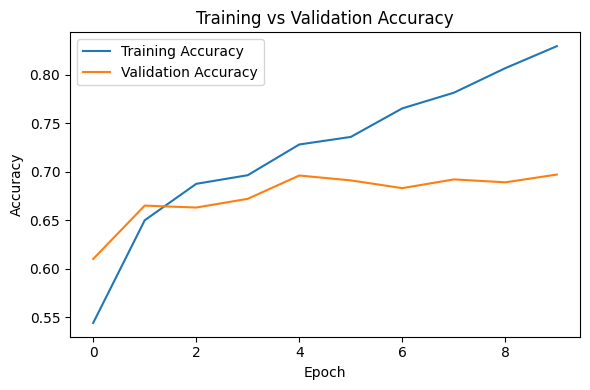

In [140]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [141]:
#ENTER YOUR CODE HERE

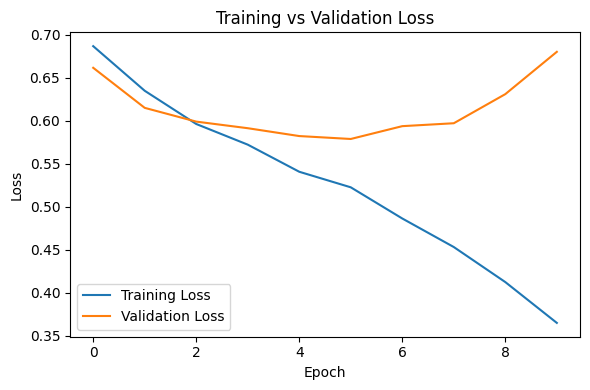

In [142]:
# Plot Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


**Lets see what the accuracy of the model is.**

In [143]:
#ENTER YOUR CODE HERE

In [144]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set
y_pred_probs = model.predict(X_test_seq)
y_pred = (y_pred_probs > 0.5).astype("int32")  # Convert probabilities to 0 or 1

# Print classification report
print(classification_report(y_test_encoded, y_pred))

# Print accuracy
acc = accuracy_score(y_test_encoded, y_pred)
print(f"\n Test Accuracy: {acc:.2f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       492
           1       0.67      0.79      0.73       508

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.69      1000
weighted avg       0.70      0.70      0.69      1000


 Test Accuracy: 0.70


**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [145]:
#ENTER YOUR CODE HERE

In [146]:
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Pick a random sequence ---
idx = random.randint(0, len(X_test_seq) - 1)
sample_sequence = X_test_seq[idx]
sample_label = y_test_encoded[idx]

# --- Predict sentiment ---
sample_pred = model.predict(np.array([sample_sequence]))
predicted_label = (sample_pred > 0.5).astype("int32")
predicted_sentiment = label_encoder.inverse_transform(predicted_label)[0]
actual_sentiment = label_encoder.inverse_transform([sample_label])[0]

# --- Decode text from sequence ---
# Invert the word index
reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
decoded_text = ' '.join([reverse_word_index.get(i, '') for i in sample_sequence if i != 0])

# --- Display results ---
print(f" The chosen sequence is: {sample_sequence}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
 The chosen sequence is: [   0    0    0    0    0    0    0    0    0    0    0    0  134  113
  138    1 3494   31  128  100  234  210 2542    1 3022   58]


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
#ENTER YOUR CODE HERE

In [148]:
print(f"The decoded text is: {decoded_text}")


The decoded text is: ok is someth i srsli need do ive book sound similar i borrow friend


**We can try this on a random string as well.**

In [149]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

In [150]:
# Step 1: Remove stopwords
text = ' '.join([word for word in input_str.split() if word.lower() not in (stopwords)])

# Step 2: Remove URLs, mentions, and punctuation (retain letters and spaces)
text = re.sub(r'http\S+|@\w+', '', text)
text = re.sub(r'[^a-zA-Z\s]', '', text)

# Step 3: Stemming
text = ' '.join([stemmer.stem(word) for word in text.lower().split()])

# Step 4: Tokenize and pad
seq = tokenizer.texts_to_sequences([text])
padded_seq = pad_sequences(seq, padding='pre', maxlen=MAX_SEQUENCE_LENGTH)

# Step 5: Predict
prediction = model.predict(padded_seq)
predicted_class = label_encoder.inverse_transform([int(prediction[0][0] > 0.5)])

# Output
print(f"Processed input: {text}")
print(f"The predicted sentiment is: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processed input: hate everyon earth
The predicted sentiment is: Negative


## GOOD JOB!